# Problem Set 01
1. Name: Kiera Murray
1. Field that you're interested in applying TS and forecasting to (ecology, econ, weather, etc): weather, climate, human effects on the environment

# Obtain a CSV of time series data
1. By whatever means, get a `.csv` file of time series data relating to any topic: ecological, financial, etc.
1. There should be at least three variables of data
1. If you download from the web, include a link. If you use ChatGPT, include a link to your shared search

Data source: https://data.world/data-society/global-climate-change-data "Global Climate Change Data: Global Land Temperatures By Major City"

ChatGPT searches: https://chat.openai.com/share/e7611222-f3a4-4acb-9104-2e7ca5258102

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Read in raw data
data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

# Select 3 cities to analyze, and rearrange the dataframe so each city is its own column
dataStPetersburg = data[data['City'] == 'Saint Petersburg']
dataSingapore = data[data['City'] == 'Singapore']
dataMelbourne = data[data['City'] == 'Melbourne']
data = pd.merge(dataStPetersburg, dataSingapore, on='dt', how='inner') #combine St. Petersburg & Singapore data
data = pd.merge(data, dataMelbourne, on='dt', how='inner') #add Melbourne data
data.rename(columns={'AverageTemperature_x': 'StPetersburg_AvgTemp', 'AverageTemperature_y': 'Singapore_AvgTemp', 'AverageTemperature': 'Melbourne_AvgTemp'}, inplace=True)
data = data[['dt', 'StPetersburg_AvgTemp', 'Singapore_AvgTemp', 'Melbourne_AvgTemp']] #get rid of unneeded columns

# Set datetime index and filter out values before 1950 (otherwise there's too much data to visualize)
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)
data = data[data.index > '1950']
data = data.dropna()

# Look at the modified data
data

,StPetersburg_AvgTemp,Singapore_AvgTemp,Melbourne_AvgTemp
dt,,,
1950-02-01,-5.829,26.368,17.980
1950-03-01,-2.812,26.775,16.769
1950-04-01,5.366,26.691,13.641
1950-05-01,8.655,27.268,10.472
1950-06-01,13.055,27.367,7.962
...,...,...,...
2013-04-01,2.167,27.767,14.762
2013-05-01,12.355,28.083,11.836
2013-06-01,17.185,28.662,9.365


# 1. Time series plots
1. Plot the raw time series data
1. Identify any time series patterns
1. Identify any interesting trends insight

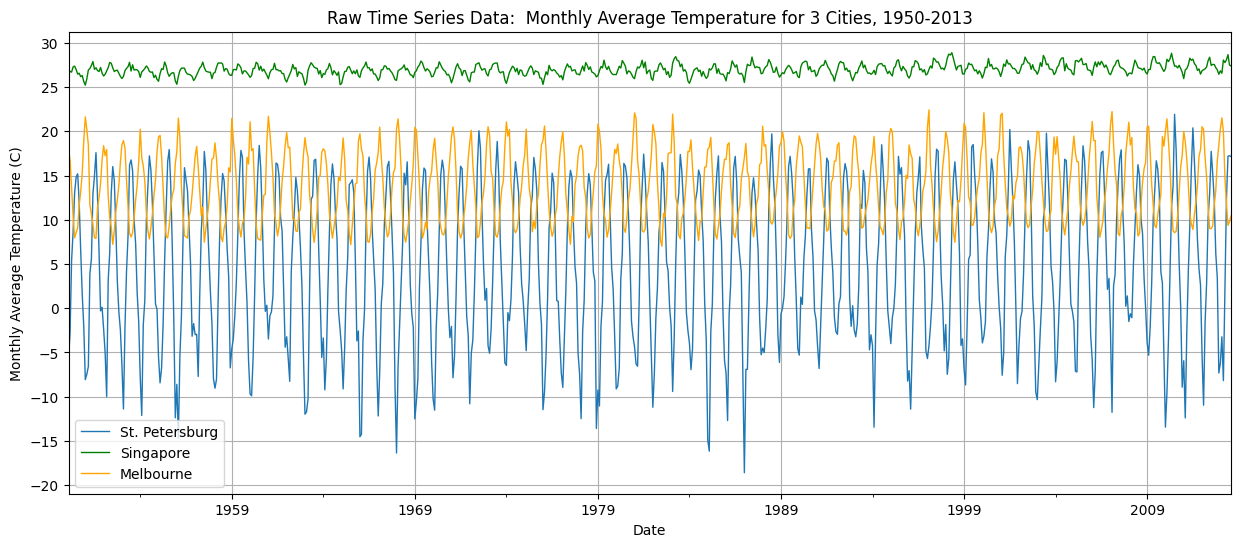

In [2]:
plt.figure(figsize=(15, 6))

data['StPetersburg_AvgTemp'].plot(linewidth=1, label='St. Petersburg')
data['Singapore_AvgTemp'].plot(linewidth=1, label='Singapore', color='green')
data['Melbourne_AvgTemp'].plot(linewidth=1, label='Melbourne', color='orange')

plt.xlabel('Date')
plt.ylabel('Monthly Average Temperature (C)')
plt.title('Raw Time Series Data:  Monthly Average Temperature for 3 Cities, 1950-2013')
plt.legend()
plt.yticks(np.arange(-20, 35, 5))
plt.grid(True)

plt.show()

All 3 city temperatures show strong seasonality, with colder temperatures in the winter and hotter temperatures in the summer. St. Petersburg, Russia, experiences both the coldest temperatures and the greatest seasonal changes as a consequence of its high northern latitude. Singapore, which is close to the equator, experiences both the warmest temperatures and the smallest variation. Melbourne, Australia, is located at middling latitude in the Southern Hemisphere, and so experiences moderate average temperature and variation, but with summer and winter opposite to the Northern Hemisphere cities.

Because of climate change, all 3 city temperatures show a subtle upward trend starting around 1985.

# 2. Scatterplots
1. Plot a 3x3 grid of all pairwise scatterplots
1. Identify any interesting trends insight

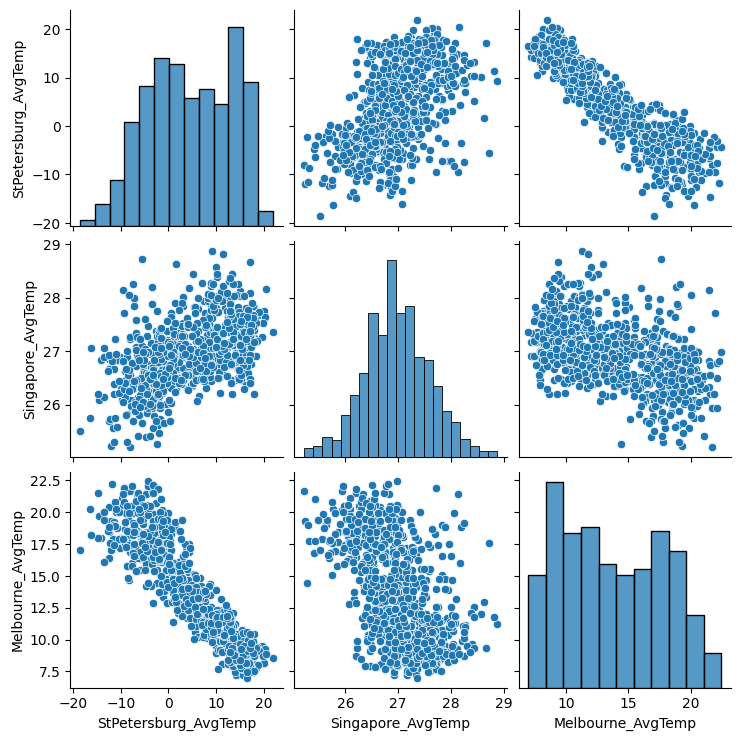

In [3]:
sns.pairplot(data)

The St. Petersburg and Singapore average monthly temperatures are positively correlated, because both cities are in the Northern Hemisphere, meaning they experience the same season at the same time. However, all other temperature pairs are negatively correlated because Melbourne is in the Southern Hemisphere, meaning that it is always experencing the oppsite season as the other cities. 

The plots involving Singapore's monthly temperatures appear to show a weaker correlation than the ones with only St. Petersburg and Melbourne temperatures. This may be because Singapore experiences much less seasonal variation than the other cities.

# 3. Lag & autocorrelation plots
1. Plot a lag plot of any variable of your choice to *visualize* its relationship to itself in the past. Use a maximum $k$ value of your choice
1. Plot an autocorrelation plot of this same variable to *quantify* its relationship to itself in the past. Use a maximum $k$ value of your choice

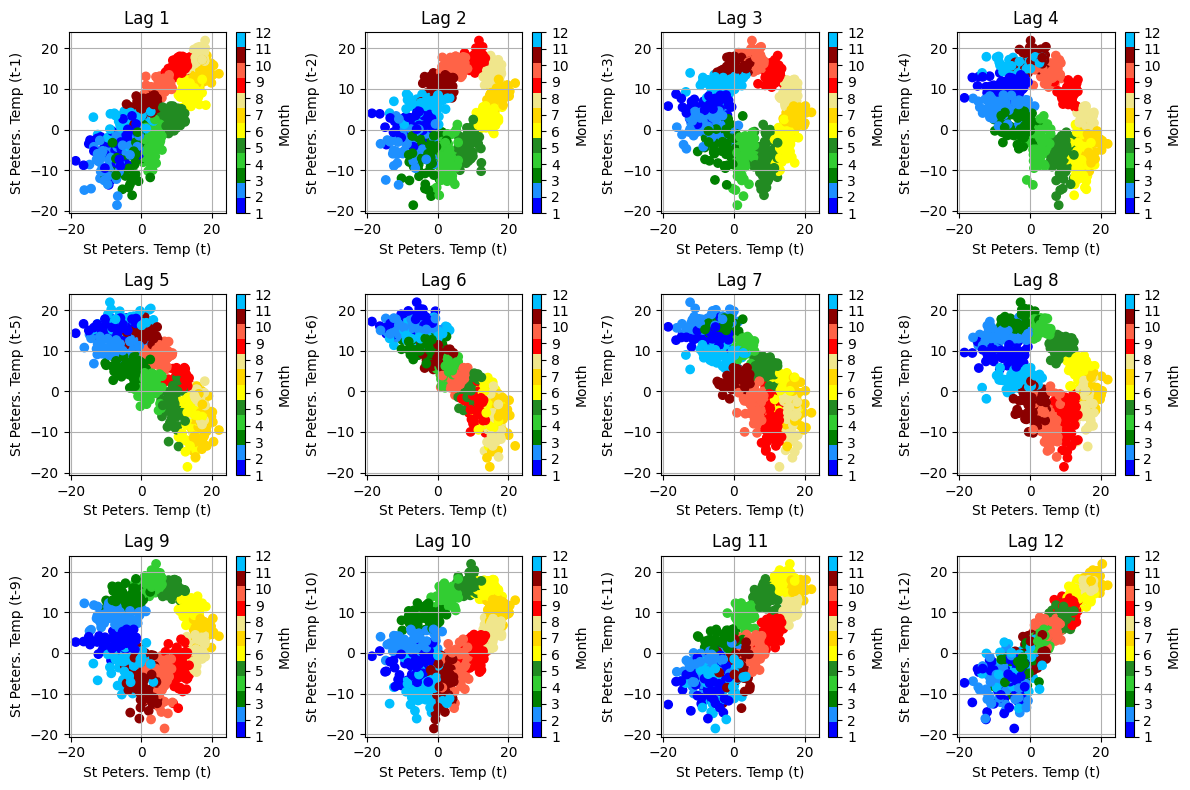

In [4]:
# Lag plots of St. Petersberg average monthly temperature
# Code mostly written by ChatGPT


# Define the maximum lag value (k)
max_k = 12

# Create a colormap for months
cmap = ListedColormap(['blue', 'dodgerblue', 'green', 'limegreen', 'forestgreen', 'yellow', 'gold', 'khaki', 'red', 'tomato', 'darkred', 'deepskyblue'])

# Create separate scatterplots for each lag value
plt.figure(figsize=(12, 8))

for lag in range(1, max_k + 1):
    plt.subplot(3, 4, lag)  # Create a 3x4 grid of subplots
    lagged_col = data['StPetersburg_AvgTemp'].shift(lag)
    months = data.index.month  # Extract the month from the index
    scatter = plt.scatter(data['StPetersburg_AvgTemp'], lagged_col, c=months, cmap=cmap)
    plt.title(f'Lag {lag}')
    plt.xlabel('St Peters. Temp (t)')
    plt.ylabel(f'St Peters. Temp (t-{lag})')
    plt.colorbar(scatter, ticks=np.arange(1, 13), label='Month')
    plt.grid(True)

plt.tight_layout()
plt.show()

Above are lag plots for St. Petersburg average monthly temperature, with lags ranging from 1 (a month) to 12 (a year). Lag 12, in which a month's average temperature is plotted against itself, shows the strongest positive correlation. The strongest negative correlation appears at Lag 6, in which a month is plotted against its seasonal opposite. The plots at Lag 3 and Lag 9 show the weakest correlation, when a month is plotted against one with a middling temperature difference. The 'donut' shape is caused by St. Petersburg's extreme seasonal temperature variation.

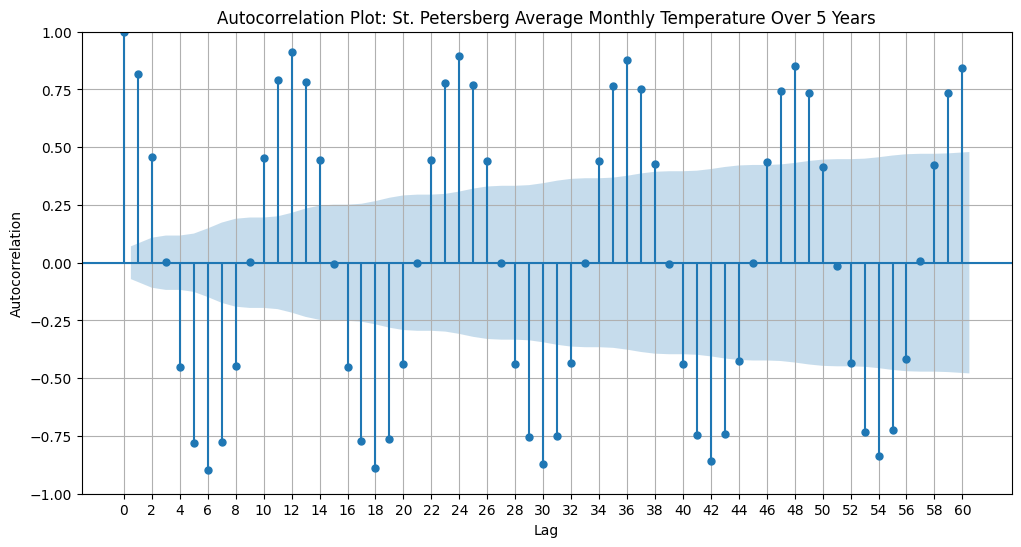

In [5]:
# Autocorrelation plot of St. Petersberg average monthly temperature


# Define the maximum lag value (k)
max_k = 60

# Create the autocorrelation plot (ACF)
plt.figure(figsize=(12, 6))
plot_acf(data['StPetersburg_AvgTemp'], lags=max_k, ax=plt.gca())
plt.title(f'Autocorrelation Plot: St. Petersberg Average Monthly Temperature Over 5 Years')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.xticks(np.arange(0, 62, 2))
plt.show()


The autocorrelation plot of St. Petersburg's average monthly temperature shows strong seasonality. A month experiences the most positive autocorrelation at Lag 0, 12, 24, etc., when the same month appears. The most negative autocorrelation occurs at Lag 6, 18, 30, ect., with the month's seasonal opposite. Autocorrelation is positive closer to the month itself and negative closer to its seasonal opposite, since average temperature changes continuously.

We can also observe over this plot of 5 years that the strength of autocorrelation always decays with increasing Lag.

# Appendix: Choosing cities

In [6]:
# Look at the raw data

originaldata = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
originaldata

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [7]:
# Filter dates and look at what cities have the most data for this timeframe

originaldata.set_index('dt', inplace=True)
originaldata = originaldata[originaldata.index > '1960']
originaldata['City'].mode()

0         Abidjan
1     Addis Abeba
2       Ahmadabad
3          Aleppo
4      Alexandria
         ...     
95          Tokyo
96        Toronto
97     Umm Durman
98          Wuhan
99           Xian
Name: City, Length: 100, dtype: object

### Find some cities at diverse latitiudes to analyze:

In [8]:
# Convert Latitude to a number

def convert_latitude(lat_str):
    """ Written by ChatGPT """
    lat_value = float(lat_str.rstrip('NS'))
    if 'S' in lat_str:
        lat_value *= -1  # Convert to a negative value for southern latitudes
    return lat_value

originaldata['Latitude'] = originaldata['Latitude'].apply(convert_latitude)

/var/folders/qc/qz8fv61s4xs8w475xp4n7d840000gn/T/ipykernel_54075/3019456029.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  originaldata['Latitude'] = originaldata['Latitude'].apply(convert_latitude)


In [9]:
# Find a northernmost city

test = originaldata[originaldata['Latitude'] > 60]
test['City'].mode()

0    Saint Petersburg
Name: City, dtype: object

In [10]:
# Find an equatorial city

test = originaldata[(originaldata['Latitude'] > -1) & (originaldata['Latitude'] < 1)]
test['City'].mode()

0      Nairobi
1    Singapore
Name: City, dtype: object

In [11]:
# Find a southernmost city

test = originaldata[originaldata['Latitude'] < -35]
test['City'].mode()

0    Melbourne
Name: City, dtype: object